# Model 3
# About Dataset
## Context : Predict behavior to retain customers.( Churn Or Not)
## Content : 
Each row represents a customer, each column contains customer’s attributes , The data set includes information about:

- Customers who left within the last month – the column is called Churn 
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Metadata:
   - customerID:Customer ID
   - gender:Whether the customer is a male or a female
   - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
   - Partner: Whether the customer has a partner or not (Yes, No)
   - Dependents: Whether the customer has dependents or not (Yes, No)
   - tenure:Number of months the customer has stayed with the company
   - PhoneService:Whether the customer has a phone service or not (Yes, No)
   - MultipleLines:Whether the customer has multiple lines or not (Yes, No, No phone service)
   - InternetService:Customer’s internet service provider (DSL, Fiber optic, No)
   - OnlineSecurity:Whether the customer has online security or not (Yes, No, No internet service)
   - OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
   - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
   - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
   - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
   - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
   - Contract: The contract term of the customer (Month-to-month, One year, Two year)
   - PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
   - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
   - MonthlyCharges: The amount charged to the customer monthly
   - TotalCharges : The total amount charged to the customer
   
   - Churn: Whether the customer churned or not (Yes or No)**Label**
   
## Requirements

**1- Load data and features are numerical ( discrete, continuous, or timeseries based ). (data Path =`WA_Fn-UseC_-Telco-Customer-Churn_2.csv`)**

**2-  Use visualization to drive that churned clients have lower range in TotalCharges**

**3- Based on your observations from First requirement :**

   - Check outlier in continuous Features 
   - Check Missing values and Handle it

**4- Extract The Most important feature based on Mutual information**

**5- Use DecisionTreeClassifier to predict customer churned and show why your model can decide customer churn**

#### Hint: 
- you can consider any empty string as missing values 
- you are free to apply any method to address any necessary data transformations and cleaning procedures

In [23]:
### imports ####
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif,f_classif,SelectKBest 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

In [24]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_2.csv')

# explore the data 

In [25]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,NaN,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [26]:
data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,NaN,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [27]:
data.shape

(7043, 21)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      6269 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Use visualization to drive that churned clients have lower range in TotalCharges 

In [31]:
index=0
for i in data.columns:
    print(index)
    print(i)
    print(data[i].dtypes)
    print(data[i].unique())
    index+=1
    print('')

0
customerID
object
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

1
gender
object
['Female' 'Male']

2
SeniorCitizen
int64
[0 1]

3
Partner
object
['Yes' 'No']

4
Dependents
object
['No' 'Yes']

5
tenure
int64
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

6
PhoneService
object
['No' 'Yes' nan]

7
MultipleLines
object
['No phone service' 'No' 'Yes']

8
InternetService
object
['DSL' 'Fiber optic' 'No']

9
OnlineSecurity
object
['No' 'Yes' 'No internet service']

10
OnlineBackup
object
['Yes' 'No' 'No internet service']

11
DeviceProtection
object
['No' 'Yes' 'No internet service']

12
TechSupport
object
['No' 'Yes' 'No internet service']

13
StreamingTV
object
['No' 'Yes' 'No internet service']

14
StreamingMovies
object
['No' 'Yes' 'No internet service']

15
Contract
obje

<Axes: xlabel='TotalCharges', ylabel='Churn'>

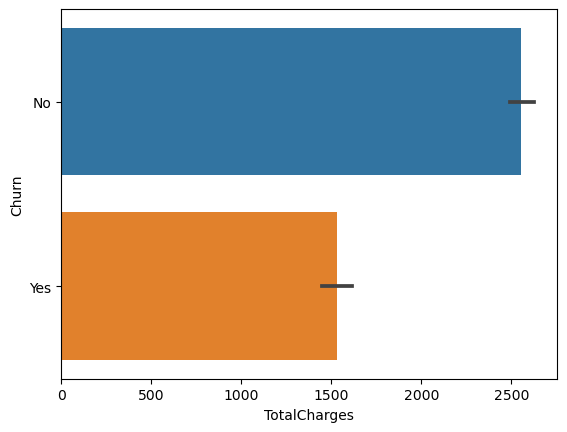

In [30]:
sns.barplot(x=data['TotalCharges'],y=data['Churn'])

# cheack the nan value

In [32]:
data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService        774
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges         11
Churn                 0
dtype: int64

In [33]:
data.isna().mean()

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.109896
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

# cheack outlier 

In [34]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
data['PhoneService']=data['PhoneService'].fillna(data['PhoneService'].mode()[0])

data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].median())
# fill by median because it possible to see outlier

In [36]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# data types 

In [37]:
data.select_dtypes(include='int64')
# discrete tenure
# binary or categorical seniorCitizen

,SeniorCitizen,tenure
0,0,1
1,0,34
2,0,2
3,0,45
4,0,2
...,...,...
7038,0,24
7039,0,72
7040,0,11
7041,1,4


In [38]:
cont_feat = data.select_dtypes(include='float64').columns
cont_feat
# continuous

Index(['MonthlyCharges', 'TotalCharges'], dtype='object')

MonthlyCharges


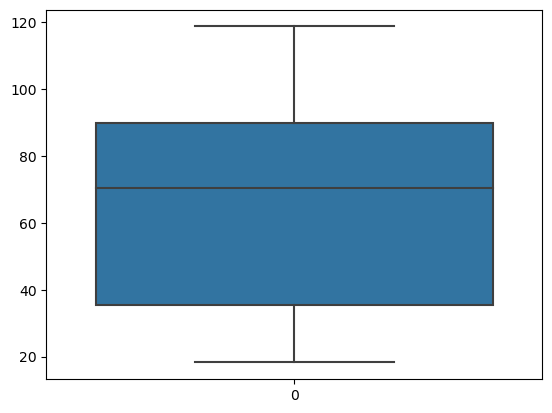

TotalCharges


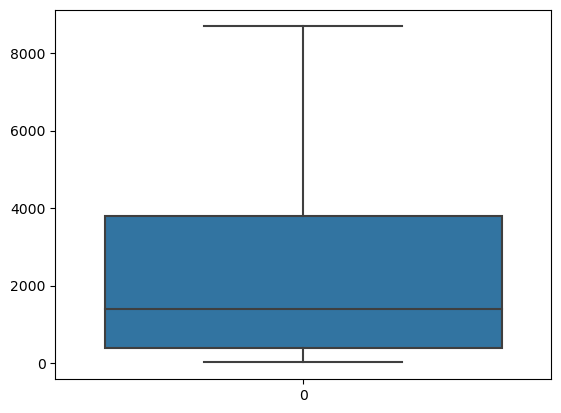

In [39]:
for col in cont_feat:
    print(col)
    sns.boxplot(data[col])
    plt.show()

# drop customerID and convert string to integer 

In [40]:
data = data.drop(columns='customerID',axis=1)

In [42]:
cate_column = data.select_dtypes(include="object").columns
label_encoder = LabelEncoder()
for i in cate_column:
    data[i]=label_encoder.fit_transform(data[i])

In [47]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#  mutual_info_classif

In [48]:
mic = SelectKBest(score_func=mutual_info_classif,k=5)
x= data.drop(columns='Churn',axis=1)
y=data['Churn']
mic.fit(x,y)

SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x0000023E2E2DCEE0>)

In [50]:
score_best = pd.Series(mic.scores_,index=x.columns)
score_best.sort_values(ascending=False)

Contract            0.100174
OnlineSecurity      0.074136
tenure              0.071521
TechSupport         0.068229
InternetService     0.059089
PaymentMethod       0.049827
OnlineBackup        0.044604
TotalCharges        0.043594
StreamingTV         0.042807
MonthlyCharges      0.042080
DeviceProtection    0.041666
StreamingMovies     0.025026
Dependents          0.016585
PaperlessBilling    0.013529
SeniorCitizen       0.010480
Partner             0.009344
MultipleLines       0.000000
PhoneService        0.000000
gender              0.000000
dtype: float64

# DecisionTreeClassifier model

In [51]:
x_train , x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7340274491244676